### Libraries

In [1]:
import sys
sys.path.append('../python-scripts')
from decision_tree_classifier import decision_tree_classifier
from random_forest_classifier import random_forest_classifier

In [31]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score

In [32]:
import matplotlib.pyplot as plt
%matplotlib inline

### Data

In [3]:
cancer = load_breast_cancer()

In [4]:
df = pd.DataFrame(cancer.data, columns=cancer.feature_names)

In [5]:
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [6]:
df.shape

(569, 30)

In [7]:
set(cancer.target)

{0, 1}

### Train Test Split

In [8]:
x_train, x_test, y_train, y_test = train_test_split(df, cancer.target)

In [9]:
def results(true, pred):
    print('Accuracy: ', accuracy_score(true, pred))
    print('F1 Score: ', f1_score(true, pred))

### Single Decision Tree

In [10]:
dtc = decision_tree_classifier()
dtc.fit(x_train, y_train)

In [11]:
#dtc.tree

In [12]:
tree_pred = dtc.predict(x_test)
results(y_test, tree_pred)

Accuracy:  0.93006993007
F1 Score:  0.942528735632


### Random Forest

In [22]:
rf = random_forest_classifier(n_trees=10)
rf.fit(x_train, y_train)

In [20]:
forest_pred = rf.predict(x_test)

In [21]:
results(y_test, forest_pred)

Accuracy:  0.965034965035
F1 Score:  0.972067039106


### More Trees

In [28]:
trees = np.arange(10,40,5)

In [34]:
acc = []
f1 = []
for n_trees in trees:
    rf = random_forest_classifier(n_trees=n_trees)
    rf.fit(x_train, y_train)
    pred = rf.predict(x_test)
    acc.append(accuracy_score(y_test, pred))
    f1.append(f1_score(y_test, pred))

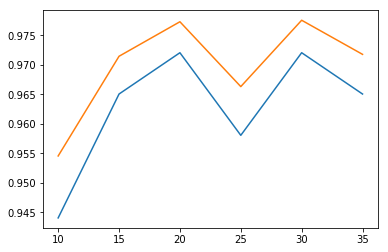

In [35]:
plt.plot(trees, acc)
plt.plot(trees, f1)